In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dataset.csv")

# --- Step 1: Data Cleaning & Feature Engineering ---

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Create new time-based features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['weekday'] = df['order_date'].dt.day_name()

# Check and handle missing values
print("Missing Values:\n", df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# (Optional) View changes
print("\nPreview with new features:")
print(df[['order_date', 'year', 'month', 'day', 'weekday']].head())


Missing Values:
 order_id       0
order_date     0
sku            0
color          0
size          37
unit_price     0
quantity       0
revenue        0
year           0
month          0
day            0
weekday        0
dtype: int64

Preview with new features:
           order_date  year  month  day    weekday
0 2022-06-01 16:05:00  2022      6    1  Wednesday
1 2022-06-01 16:05:00  2022      6    1  Wednesday
2 2022-06-10 17:03:00  2022      6   10     Friday
3 2022-06-10 19:59:00  2022      6   10     Friday
4 2022-06-11 11:42:00  2022      6   11   Saturday


In [2]:
df['size'].fillna('Unknown', inplace=True)

# Save the cleaned dataset to a new CSV file
cleaned_file_path = "cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)

cleaned_file_path

C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3944471365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna('Unknown', inplace=True)


'cleaned_dataset.csv'

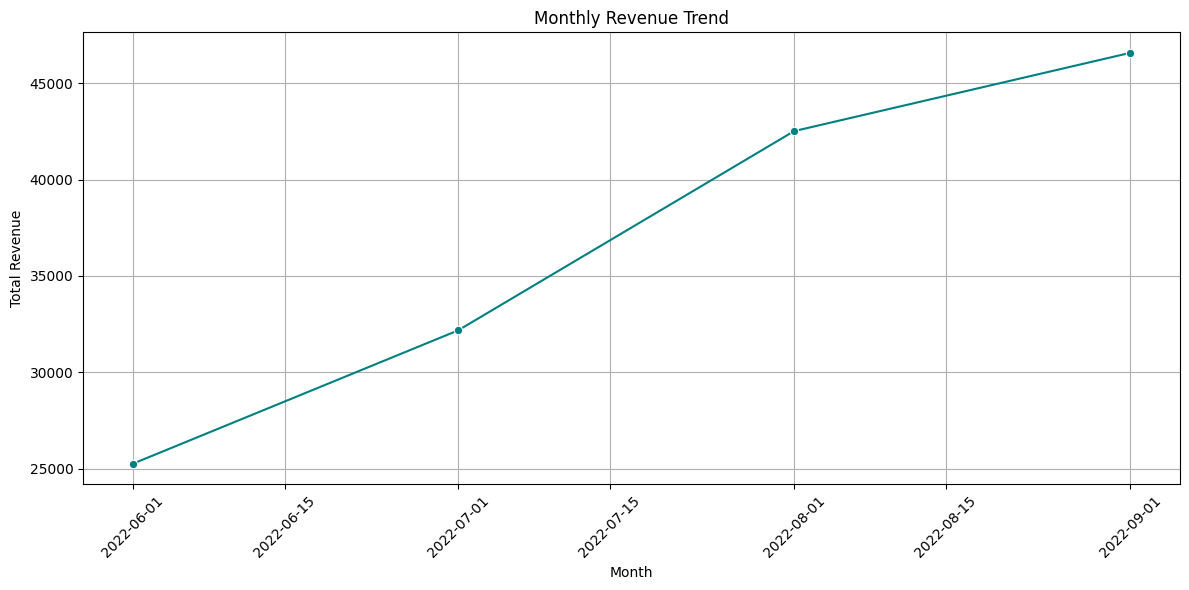

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by year and month to get monthly revenue
monthly_revenue = df.groupby(['year', 'month'])['revenue'].sum().reset_index()
monthly_revenue['period'] = pd.to_datetime(monthly_revenue[['year', 'month']].assign(day=1))

# Plot monthly revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='period', y='revenue', marker='o', color='teal')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3354535366.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skus.values, y=top_skus.index, palette='viridis')


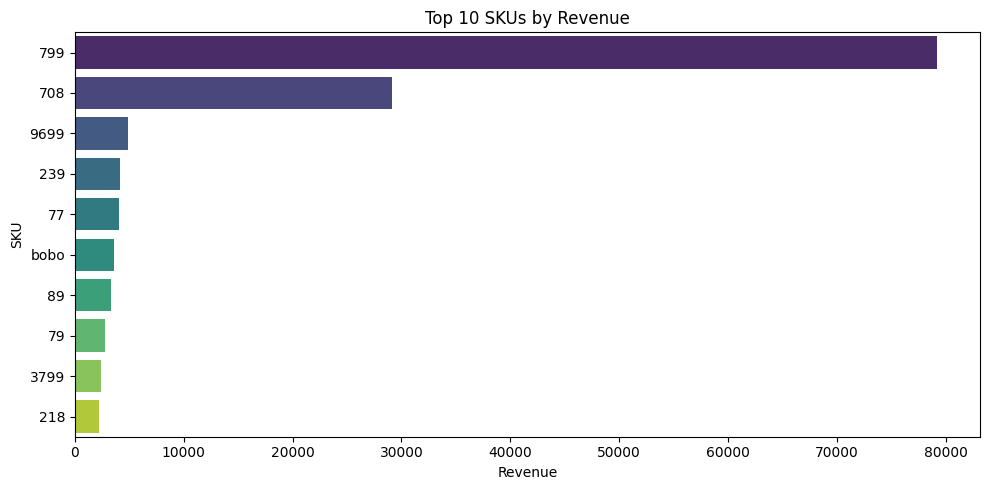

In [5]:
top_skus = df.groupby('sku')['revenue'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_skus.values, y=top_skus.index, palette='viridis')
plt.title('Top 10 SKUs by Revenue')
plt.xlabel('Revenue')
plt.ylabel('SKU')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3309823385.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_sales.values, y=color_sales.index, palette='magma')


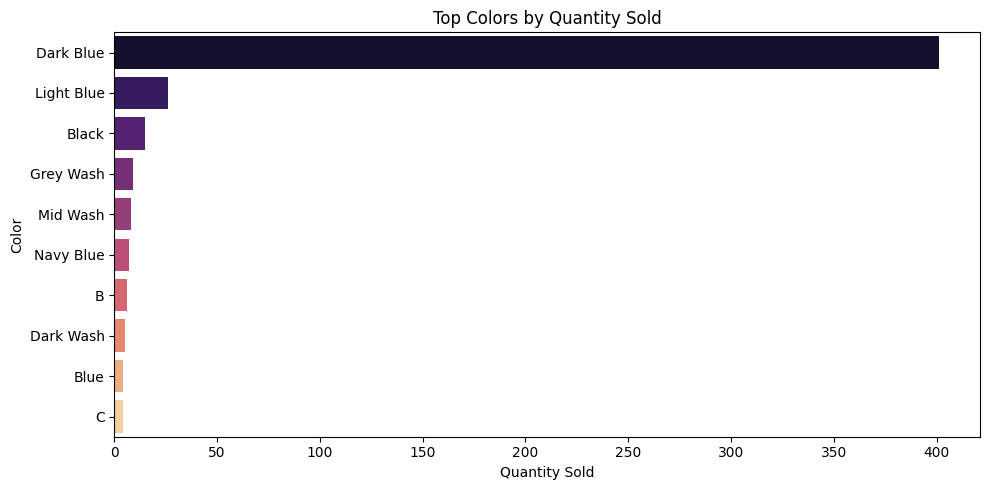

In [6]:
color_sales = df.groupby('color')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=color_sales.values, y=color_sales.index, palette='magma')
plt.title('Top Colors by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Color')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\2309010219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_sales.values, y=size_sales.index, palette='coolwarm')


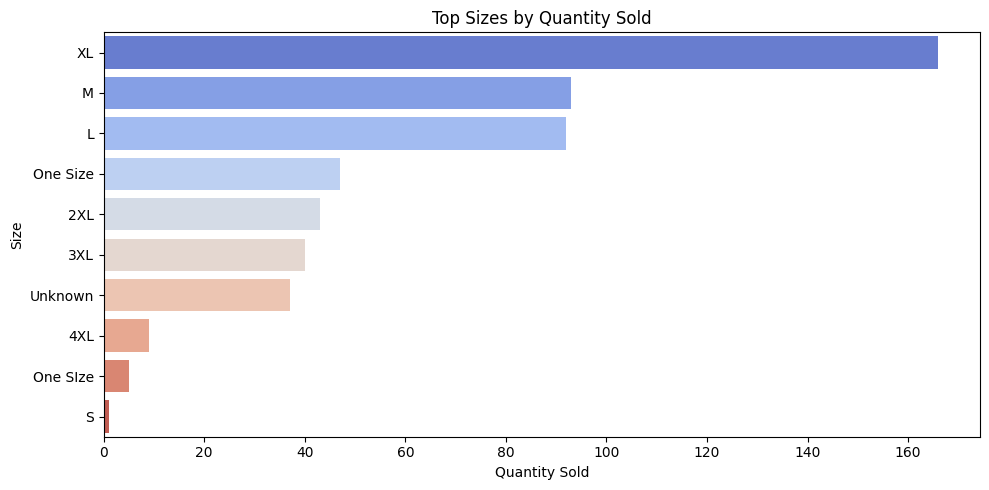

In [7]:
size_sales = df.groupby('size')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=size_sales.values, y=size_sales.index, palette='coolwarm')
plt.title('Top Sizes by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Size')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3394029759.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_value_by_day.index, y=order_value_by_day['avg_order_value'], palette='Set2')


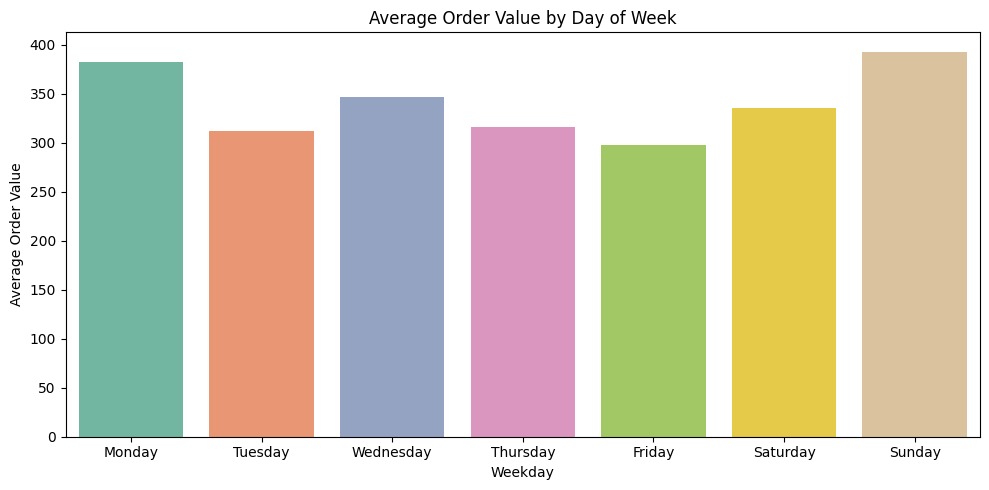

In [8]:
order_value_by_day = df.groupby('weekday').agg({'revenue': 'sum', 'order_id': 'nunique'})
order_value_by_day['avg_order_value'] = order_value_by_day['revenue'] / order_value_by_day['order_id']
order_value_by_day = order_value_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 5))
sns.barplot(x=order_value_by_day.index, y=order_value_by_day['avg_order_value'], palette='Set2')
plt.title('Average Order Value by Day of Week')
plt.ylabel('Average Order Value')
plt.xlabel('Weekday')
plt.tight_layout()
plt.show()


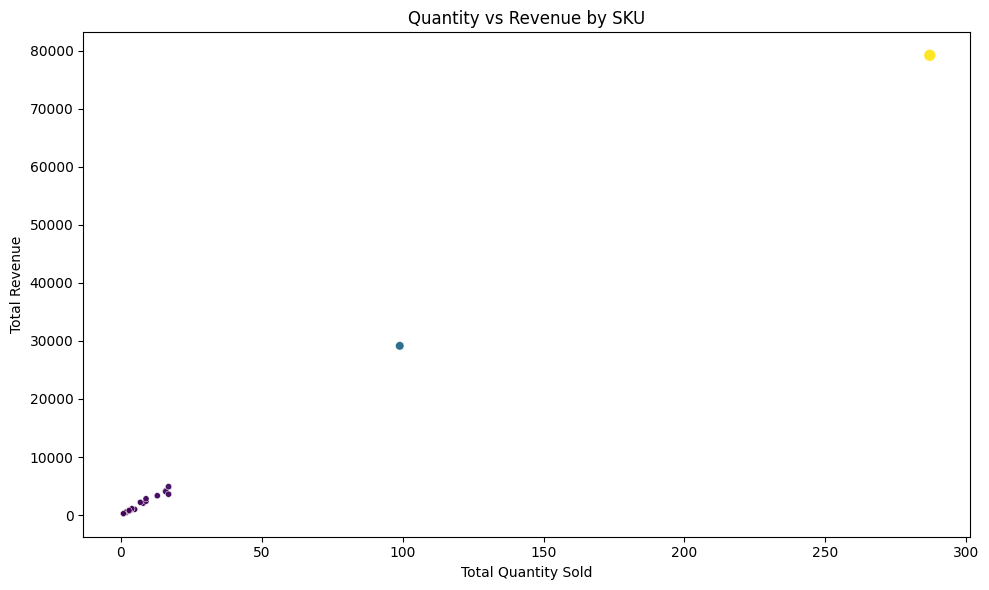

In [9]:
sku_stats = df.groupby('sku').agg({'quantity': 'sum', 'revenue': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sku_stats, x='quantity', y='revenue', size='revenue', hue='revenue', palette='viridis', legend=False)
plt.title('Quantity vs Revenue by SKU')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


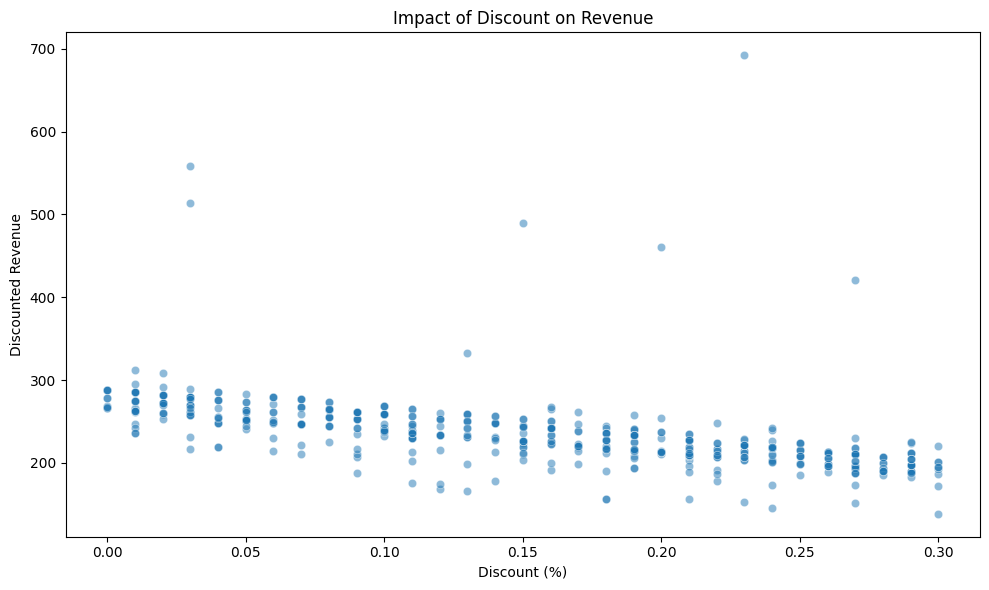

In [10]:
import numpy as np

# Simulate a 'discount' column: random 0% to 30%
np.random.seed(42)
df['discount'] = np.random.uniform(0, 0.3, size=len(df)).round(2)

# Calculate actual revenue after discount
df['discounted_revenue'] = df['unit_price'] * df['quantity'] * (1 - df['discount'])

# Visualize discount vs revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discount', y='discounted_revenue', alpha=0.5)
plt.title('Impact of Discount on Revenue')
plt.xlabel('Discount (%)')
plt.ylabel('Discounted Revenue')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3770192235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profit_skus.values, y=top_profit_skus.index, palette='Greens_r')


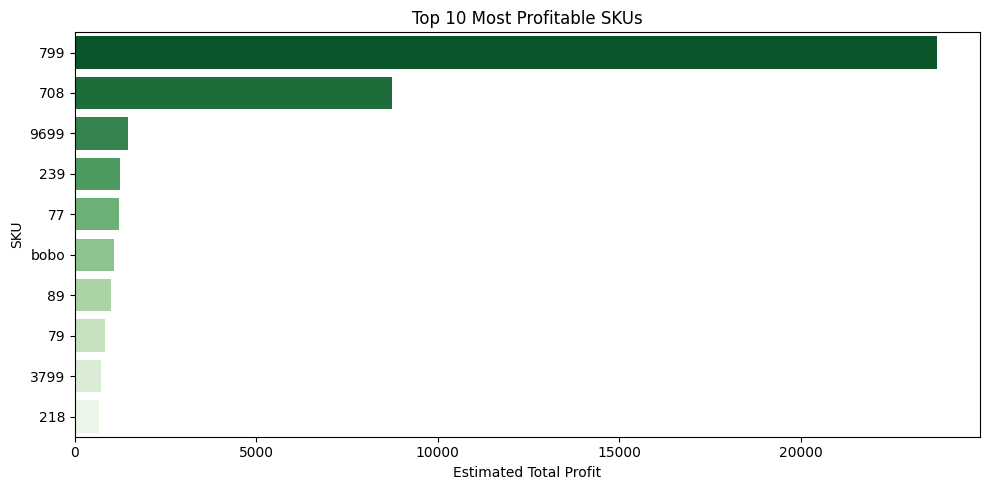

In [11]:
# Estimate cost price and profit
df['cost_price'] = df['unit_price'] * 0.7
df['profit'] = (df['unit_price'] - df['cost_price']) * df['quantity']

# Top 10 profitable SKUs
top_profit_skus = df.groupby('sku')['profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_profit_skus.values, y=top_profit_skus.index, palette='Greens_r')
plt.title('Top 10 Most Profitable SKUs')
plt.xlabel('Estimated Total Profit')
plt.ylabel('SKU')
plt.tight_layout()
plt.show()


In [12]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 645.7 kB/s eta 0:00:20
   -- ------------------------------------- 0.8/13.3 MB 729.2 kB/s eta 0:00:18
   -- ------------------------------------- 0.8/13.3 MB 729.2 kB/s eta 0:00:18
   --- ------------------------------------ 1.0/13.3 MB 699.0 kB/s eta 0:00:18
   --- ------------------------------------ 1.0/13.3 MB 699.0 kB/s eta 0:00:18
   --- ------------------------------------ 1.3/13.3 MB 677.8 kB/s eta 0:00:18
   --- ------------------------------------ 1.3/13.3 MB 677.8 kB/s eta 0:00:18
   ---- ----------------------------------- 1.6/13.3 MB 710.8 kB/s eta 0:00:17
   ---- ----------------------------------- 1.6/13.3 MB 710.8 kB/s eta 0:00:17
   ----- 

DEPRECATION: Loading egg at c:\python\lib\site-packages\argparse-1.4.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python\lib\site-packages\h11-0.12.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python\lib\site-packages\ignorant-1.2-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python\lib\site-packages\rfc3986-1.5.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for packa

Importing plotly failed. Interactive plots will not work.
C:\Users\DELL\AppData\Local\Temp\ipykernel_5980\3932700699.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='order_date', freq='M')).agg({'revenue': 'sum'}).reset_index()
18:37:17 - cmdstanpy - INFO - Chain [1] start processing
18:37:17 - cmdstanpy - INFO - Chain [1] done processing
C:\Python\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


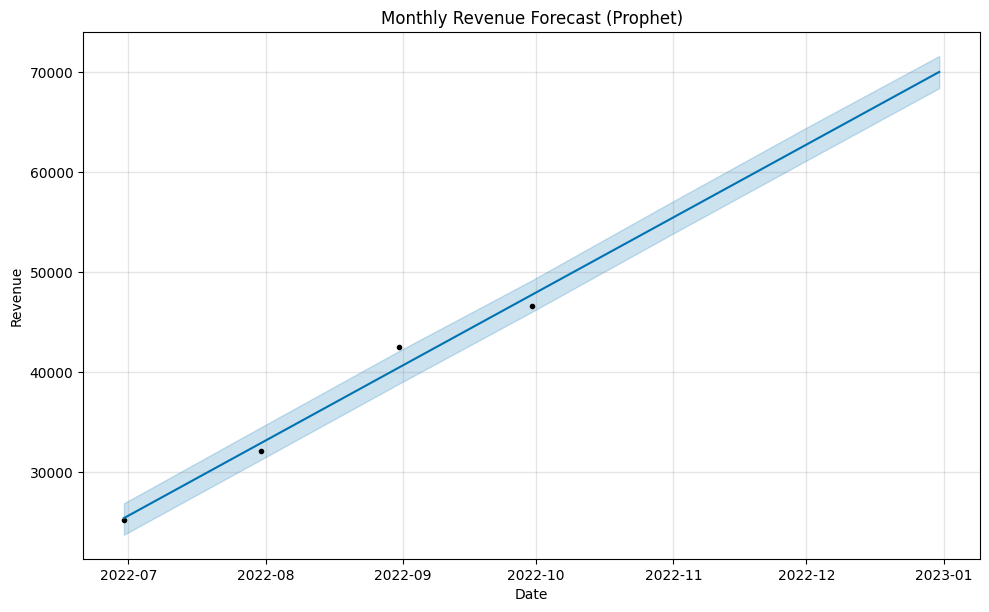

In [13]:
from prophet import Prophet

# Prepare monthly revenue data
monthly = df.groupby(pd.Grouper(key='order_date', freq='M')).agg({'revenue': 'sum'}).reset_index()
monthly.columns = ['ds', 'y']  # Prophet expects these column names

# Forecast
model = Prophet()
model.fit(monthly)

future = model.make_future_dataframe(periods=3, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Monthly Revenue Forecast (Prophet)')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


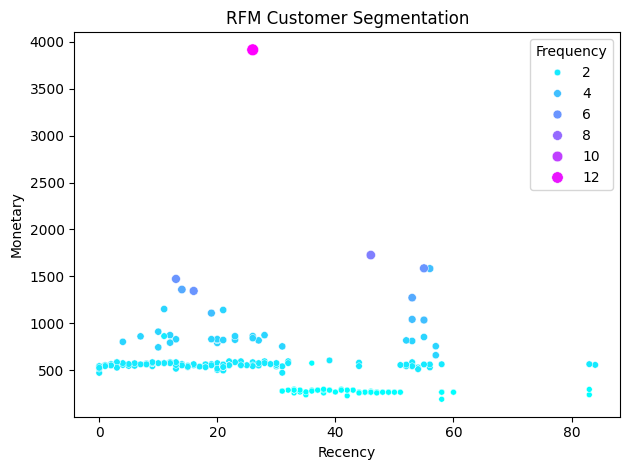

In [14]:
from datetime import datetime

# Reference date for Recency
latest_date = df['order_date'].max()

rfm = df.groupby('order_id').agg({
    'order_date': lambda x: (latest_date - x.max()).days,
    'order_id': 'count',
    'revenue': 'sum'
}).rename(columns={
    'order_date': 'Recency',
    'order_id': 'Frequency',
    'revenue': 'Monetary'
}).reset_index()

# Visualize segments
sns.scatterplot(data=rfm, x='Recency', y='Monetary', size='Frequency', hue='Frequency', palette='cool')
plt.title('RFM Customer Segmentation')
plt.tight_layout()
plt.show()
